<a href="https://colab.research.google.com/github/savindumahasen/Brain-Tumor-Classification/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


In [2]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: savinduruhunuhewa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:00<00:00, 1.21GB/s]

In [7]:
## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [11]:
## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

In [9]:
## split the train set into train set and  validation set

## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

train_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      subset='training',
                                                      validation_split=0.1,
                                                      seed=42)
validation_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           subset='validation',
                                                           validation_split=0.1,
                                                           seed=42
                                                           )

Found 5712 files belonging to 4 classes.
Using 5141 files for training.
Found 5712 files belonging to 4 classes.
Using 571 files for validation.


In [23]:
## Load the test set

test_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           )

Found 5712 files belonging to 4 classes.


In [13]:
## Get the target values

In [14]:
class_names=train_set.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [17]:
## Look at the one batch

In [16]:
for image_size, label_batch in train_set.take(1):
  print(image_size.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


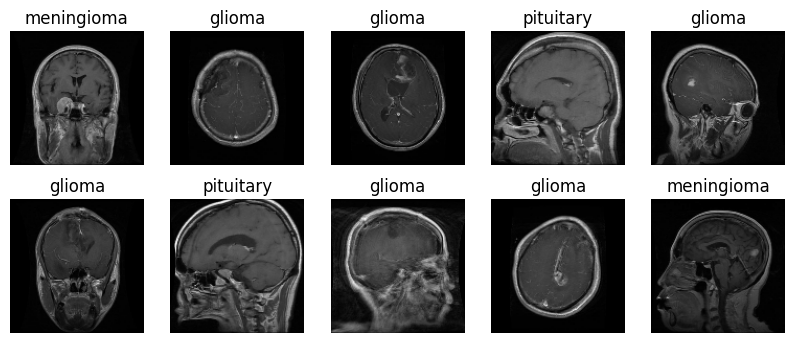

In [20]:
## Plot the data sample
plt.figure(figsize=(10,4))
for image,label in train_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [22]:
for image,label in train_set.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[3.   3.   3.  ]
   [3.   3.   3.  ]
   [3.   3.   3.  ]
   ...
   [0.   0.   0.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]]

  ...

  [[3.   3.   3.  ]
   [3.   3.   3.  ]
   [1.5  1.5  1.5 ]
   ...
   [2.   2.   2.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]]

  [[1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]]


 [[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0

In [24]:
train_data=train_set.map(lambda x,y:(x/255,y))
validation_data=validation_set.map(lambda x,y:(x/255,y))
test_data=test_set.map(lambda x,y:(x/255,y))

In [25]:
for image,label in train_set.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  ...

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]]


 [[[0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   ...
   [0.   0.   0.  ]
   [0.   0.   0.  ]
   [0.   0.   0.  ]]

  [[1.   1.   1.  ]
   [1.   1.   1.  ]
   [1.   1.   1.  ]
   ...
   [1.   1

In [26]:
## Data Augmentation

In [29]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
## Build the CNN model

model=tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,924 (12.69 MB)

 Trainable params: 3,325,668 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [51]:
## Complite the model


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [42]:
print(validation_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [52]:
from sklearn.preprocessing import LabelBinarizer

label_obj=LabelBinarizer()
encoded_label=label_obj.fit_transform(class_names)
encoded_label

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [48]:
print(train_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [35]:
## train the CNN architecture model

In [55]:
start_time=time.time()
history=model.fit(train_set,validation_data=validation_set, epochs=10)
end_time=time.time()

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8616 - loss: 0.3518 - val_accuracy: 0.8025 - val_loss: 0.5557
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.8629 - loss: 0.3674 - val_accuracy: 0.5924 - val_loss: 1.4892
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8760 - loss: 0.3446 - val_accuracy: 0.8676 - val_loss: 0.3492
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.8821 - loss: 0.3165 - val_accuracy: 0.8682 - val_loss: 0.3411
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8787 - loss: 0.3148 - val_accuracy: 0.7348 - val_loss: 0.8061
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8901 - loss: 0.2878 - val_accuracy: 0.7642 - val_loss: 0.7696
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8974 - loss: 0.2859 - val_accuracy: 0.5581 - val_loss: 2.1953
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.8861 - loss: 0.2983 - val_accu

In [56]:
## Get the values of training process

In [57]:
history.history

{'accuracy': [0.8603384494781494,
  0.8655903339385986,
  0.877650260925293,
  0.8832911849021912,
  0.8860144019126892,
  0.8916553258895874,
  0.9002139568328857,
  0.8971017599105835,
  0.9029371738433838,
  0.9097451567649841],
 'loss': [0.36038196086883545,
  0.34788328409194946,
  0.3259108066558838,
  0.312701016664505,
  0.3005845248699188,
  0.28400933742523193,
  0.2735174894332886,
  0.27361705899238586,
  0.2650783360004425,
  0.2433587908744812],
 'val_accuracy': [0.8025209903717041,
  0.5924369692802429,
  0.8676470518112183,
  0.868172287940979,
  0.7347689270973206,
  0.7641806602478027,
  0.5581232309341431,
  0.8074229955673218,
  0.5849089622497559,
  0.6745448112487793],
 'val_loss': [0.5556687712669373,
  1.4892404079437256,
  0.34915509819984436,
  0.34106960892677307,
  0.8061273097991943,
  0.769586443901062,
  2.195309638977051,
  0.599073588848114,
  1.870005488395691,
  1.402156949043274]}

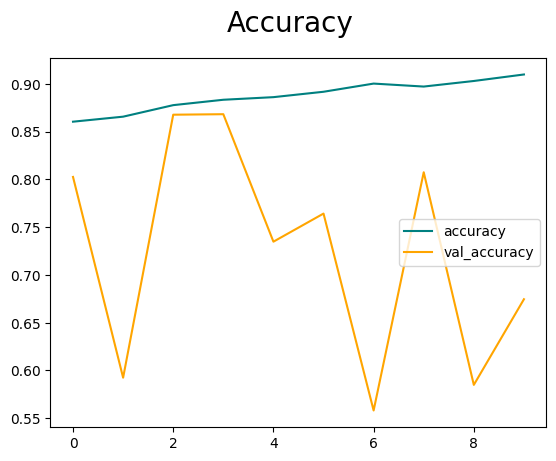

In [58]:
fig=plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

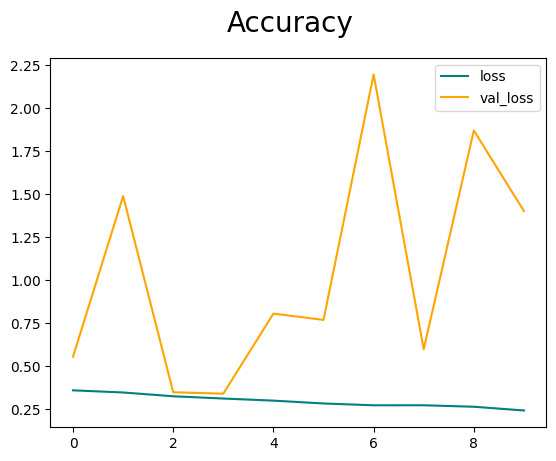

In [59]:
fig=plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()